In [1]:
#!/usr/bin/env python
# coding: utf-8
# @author Souheib Ben Mabrouk

# ## Introduction


from cVAE_train_utils import train_cVAE
from cVAE_architecture import cVAE, loss_vae
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)
sns.set_style('darkgrid')


device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
batch_size = 128

In [2]:
# ## I. Train the model on MNIST

# Define a transform to preprocess the data
transform = transforms.Compose([transforms.ToTensor()])

# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root='./mnist_data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(
    root='./mnist_data', train=False, transform=transform, download=True)

# Create data loaders to handle batch processing
batch_size = 128
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False)


# latent_dim=16
# model = cVAE(latent_dim=16).to(device)
# model = train_cVAE(model, beta=1, epochs= 15, train_loader=train_loader, test_loader=test_loader, criteration = loss_vae, optimizer=torch.optim.Adam(model.parameters(), lr=1e-3), save_model=True, saving_path='./cVAE_models/',latent_dim=16)

Epoch [1/15] - Train Loss: 134.4746 - Val Loss: 109.0414
Epoch [2/15] - Train Loss: 108.3637 - Val Loss: 105.4838
Epoch [3/15] - Train Loss: 105.2783 - Val Loss: 102.9524
Epoch [4/15] - Train Loss: 103.7168 - Val Loss: 101.3881
Epoch [5/15] - Train Loss: 102.6510 - Val Loss: 101.2747
Epoch [6/15] - Train Loss: 101.7884 - Val Loss: 99.8509
Epoch [7/15] - Train Loss: 101.0766 - Val Loss: 100.0414
Epoch [8/15] - Train Loss: 100.5927 - Val Loss: 99.0038
Epoch [9/15] - Train Loss: 100.0573 - Val Loss: 98.7171
Epoch [10/15] - Train Loss: 99.5576 - Val Loss: 98.0261
Epoch [11/15] - Train Loss: 99.1246 - Val Loss: 97.4258
Epoch [12/15] - Train Loss: 98.7446 - Val Loss: 97.2604
Epoch [13/15] - Train Loss: 98.4334 - Val Loss: 96.9971
Epoch [14/15] - Train Loss: 98.0907 - Val Loss: 96.9317
Epoch [15/15] - Train Loss: 97.8404 - Val Loss: 96.5557


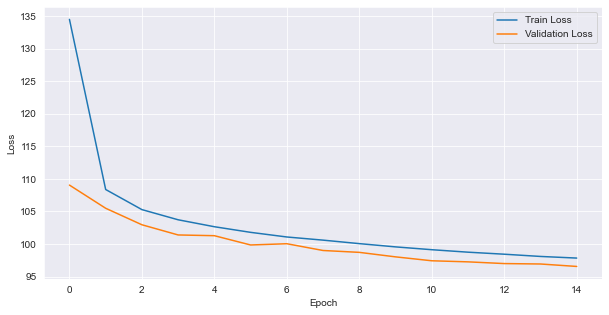

In [3]:
latent_dim = 32
model_32 = cVAE(latent_dim=32).to(device)
model_32 = train_cVAE(model_32, beta=1, epochs=15, train_loader=train_loader, test_loader=test_loader, optimizer=torch.optim.Adam(
    model_32.parameters(), lr=1e-3), criteration=loss_vae, save_model=True, saving_path='./cVAE_models/', latent_dim=32)

Epoch [1/25] - Train Loss: 267.2948 - Val Loss: 252.3300
Epoch [2/25] - Train Loss: 247.3553 - Val Loss: 245.4337
Epoch [3/25] - Train Loss: 243.9726 - Val Loss: 241.4108
Epoch [4/25] - Train Loss: 242.1109 - Val Loss: 240.4004
Epoch [5/25] - Train Loss: 240.6497 - Val Loss: 239.4621
Epoch [6/25] - Train Loss: 239.9806 - Val Loss: 238.8481
Epoch [7/25] - Train Loss: 239.3758 - Val Loss: 238.3072
Epoch [8/25] - Train Loss: 238.6465 - Val Loss: 237.6509
Epoch [9/25] - Train Loss: 238.2509 - Val Loss: 237.4651
Epoch [10/25] - Train Loss: 237.9241 - Val Loss: 237.3009
Epoch [11/25] - Train Loss: 237.4855 - Val Loss: 237.1444
Epoch [12/25] - Train Loss: 237.2514 - Val Loss: 236.6504
Epoch [13/25] - Train Loss: 237.0292 - Val Loss: 236.5443
Epoch [14/25] - Train Loss: 236.8279 - Val Loss: 236.5441
Epoch [15/25] - Train Loss: 236.5971 - Val Loss: 236.8981
Epoch [16/25] - Train Loss: 236.4426 - Val Loss: 236.1092
Epoch [17/25] - Train Loss: 236.2437 - Val Loss: 236.0175
Epoch [18/25] - Train L

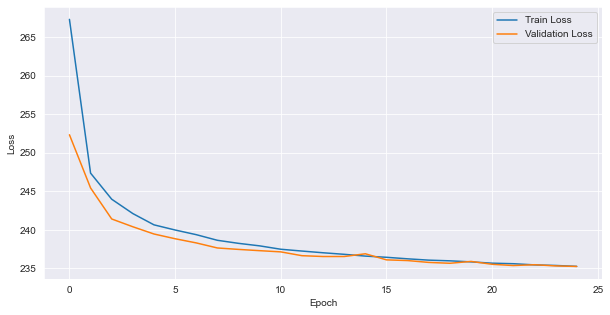

In [4]:
# ## II. FashionMnist


# Define a transform to preprocess the data
transform = transforms.Compose([transforms.ToTensor()])

# Load the MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(
    root='./FashionMNIST_data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(
    root='./FashionMNIST_data', train=False, transform=transform, download=True)

# Create data loaders to handle batch processing
batch_size = 128
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False)


latent_dim = 16
model = cVAE(input_size=28, latent_dim=16)
model = train_cVAE(model, beta=1, train_loader=train_loader, test_loader=test_loader, optimizer=torch.optim.Adam(
    model.parameters(), lr=1e-3), criteration=loss_vae, save_model=True, saving_path='./cVAEFM_models/')

Epoch [1/25] - Train Loss: 269.8073 - Val Loss: 248.5331
Epoch [2/25] - Train Loss: 248.2730 - Val Loss: 244.4458
Epoch [3/25] - Train Loss: 244.6374 - Val Loss: 243.8659
Epoch [4/25] - Train Loss: 242.6274 - Val Loss: 241.1217
Epoch [5/25] - Train Loss: 241.1390 - Val Loss: 240.8617
Epoch [6/25] - Train Loss: 240.3003 - Val Loss: 239.2038
Epoch [7/25] - Train Loss: 239.6407 - Val Loss: 238.9554
Epoch [8/25] - Train Loss: 239.0007 - Val Loss: 238.4267
Epoch [9/25] - Train Loss: 238.5654 - Val Loss: 238.3658
Epoch [10/25] - Train Loss: 238.1159 - Val Loss: 237.4511
Epoch [11/25] - Train Loss: 237.8003 - Val Loss: 237.0839
Epoch [12/25] - Train Loss: 237.4658 - Val Loss: 237.3022
Epoch [13/25] - Train Loss: 237.2527 - Val Loss: 236.6436
Epoch [14/25] - Train Loss: 236.9043 - Val Loss: 236.4398
Epoch [15/25] - Train Loss: 236.7708 - Val Loss: 236.1789
Epoch [16/25] - Train Loss: 236.4725 - Val Loss: 236.1842
Epoch [17/25] - Train Loss: 236.4229 - Val Loss: 236.1369
Epoch [18/25] - Train L

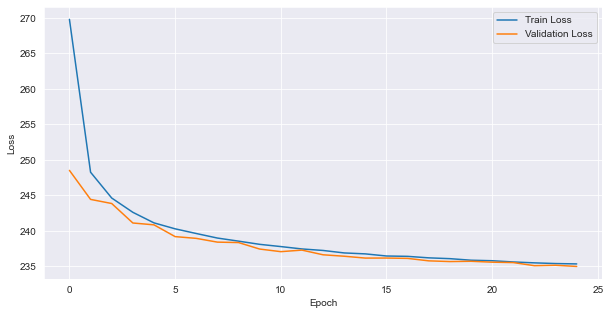

In [5]:
latent_dim = 32
model = cVAE(input_size=28, latent_dim=32)
model = train_cVAE(model, beta=1, train_loader=train_loader, test_loader=test_loader, criteration=loss_vae, optimizer=torch.optim.Adam(
    model.parameters(), lr=1e-3), save_model=True, saving_path='./cVAEFM_models/', latent_dim=32)